In [1]:
import numpy
import matplotlib.pyplot as plt

from numpy import random as rnd
from numpy import exp, exp2, log, sqrt, arctan, sin
rnd.seed(2012265)
%matplotlib inline

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

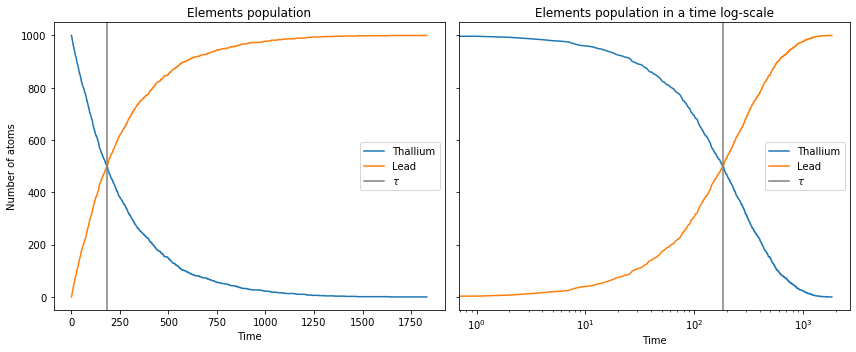

In [2]:
# setting the time records starting from 0 to 5tau in order to get more than the 99% of the decays
tau = 3.052 * 60 # in seconds
time_records = numpy.arange(0, 10*tau, dtype=int)

# defining the probability that the atom is still in Thallium form
def prob(t):
    return 1 - exp2(-t/tau)

# setting the arrays for Tl and Pb
Tl_records = numpy.zeros(time_records.size)
Pb_records = numpy.zeros(time_records.size)

# setting up the number of atoms and the random number associated to each atom
N = 1000
randoms = rnd.uniform(size=N)

# running the for loop to tipe-evolve the system
for t in time_records:
    decayed = numpy.sum(randoms < prob(t))
    Tl_records[t] = N - decayed
    Pb_records[t] = decayed

# plotting the results obtained
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
axs[0].set_title("Elements population")
axs[1].set_title("Elements population in a time log-scale")
for ax in axs:
    ax.plot(time_records, Tl_records, label="Thallium")
    ax.plot(time_records, Pb_records, label="Lead")
    ax.set_xlabel("Time")
    ax.axvline(tau, color='grey', label=r"$\tau$")
    ax.legend()
axs[0].set_ylabel("Number of atoms")
axs[1].set_xscale('log')
fig.tight_layout()

In order to apply the inverse transform method, we must focus what is the goal.

In the previous part we drew $N$ (number of atoms) random uniform numbers in the range $(0,1)$ and we assigned them to each atom. Keep in mind that $p(t) = 1 - 2^{-t/\tau}$ is the probability that each atom *is not yet decayed* at time $t$, we can determine if an atom is decayed (or not) depending on whether its random uniform is smaller (or greater) than the probability he had to survive at that time $p(t)$.

The request is to apply the inverse transform method on the function $p_\mathrm{new}(t) = \frac{\log{2}}{\tau} 2^{-t/\tau}$. If we derive the previous function $p(t)$ we find exactly this last expression, so we can state $p_\mathrm{new}(t) = p'(t)$. We can then attribute a physical meaning to this function: $p'(t)$ is the probability that an atom decays *at* the time $t$. Applying the inverse transform method we obtain the the time $t$ at which an atom decays. We now compute analytically the inverse function:
\begin{align}
\int_{0}^{z} dz' &= \int_{0}^{t} p'(t') dt'\\
z &= 1 - 2^{-t/\tau}\\
t &= -\frac{\tau}{\log{2}} \log{(1-z)}
\end{align}

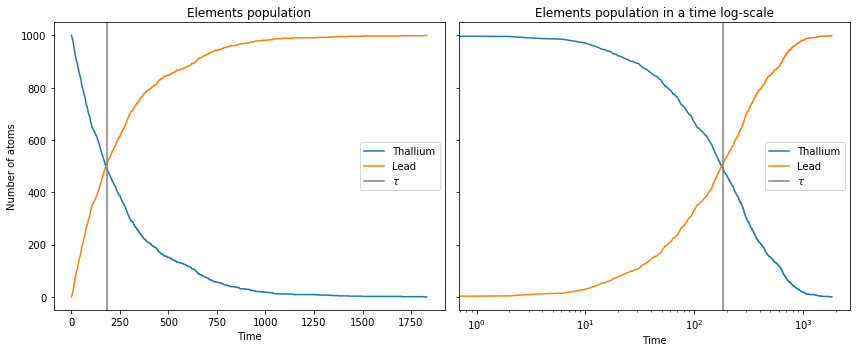

In [3]:
# setting the time records starting from 0 to 5tau in order to get more than the 99% of the decays
tau = 3.052 * 60 # in seconds
time_records = numpy.arange(0, 10*tau, dtype=int)

# function to obtain the decay time from a random uniform variable z
def decay_time(z):
    return - tau / log(2) * log(1 - z)

# setting the arrays for Tl and Pb
Tl_records = numpy.zeros(time_records.size)
Pb_records = numpy.zeros(time_records.size)

# setting up the number of atoms and the decay time associated to each atom
N = 1000
lifetime = decay_time(rnd.uniform(size=N))

# running the for loop to tipe-evolve the system
for t in time_records:
    decayed = numpy.sum(lifetime < t)
    Tl_records[t] = N - decayed
    Pb_records[t] = decayed

# plotting the results obtained
fig, axs = plt.subplots(1,2, figsize=(12,5), sharey=True)
axs[0].set_title("Elements population")
axs[1].set_title("Elements population in a time log-scale")
for ax in axs:
    ax.plot(time_records, Tl_records, label="Thallium")
    ax.plot(time_records, Pb_records, label="Lead")
    ax.set_xlabel("Time")
    ax.axvline(tau, color='grey', label=r"$\tau$")
    ax.legend()
axs[0].set_ylabel("Number of atoms")
axs[1].set_xscale('log')
fig.tight_layout()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [4]:
# defining physics constants in SI
Z = 79 + 2
from scipy.constants import e, pi, epsilon_0
E = 7.7e6 * e
from scipy.constants import hbar, m_e
a0 = 4 * pi * epsilon_0 * hbar**2 / m_e / e**2

# defining function for the angle of scattering from the impact parameter
def scatter_angle(b):
    return 2 * arctan( Z * e**2 / 2 / pi / epsilon_0 / E / b )

# generating the 2D beam of particles
N = int(1e6)
beam = numpy.vstack((rnd.normal(0, a0/100, size=N), rnd.normal(0, a0/100, size=N))).T

# computing the impact parameter and the scatter angle
b_array = sqrt(beam[:,0]**2 + beam[:,1]**2)
angles = scatter_angle(b_array)

# counting the bounced-back particles
print(f"The particles bounced back are: {numpy.sum(angles > pi/2)}")

The particles bounced back are: 1709


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [5]:
def f(x):
    return (sin(1 / x / (2 - x)))**2

# defining the hit-or-miss function
def hit_or_miss(integrand, xs, a=numpy.nan, b=numpy.nan, ymax=numpy.nan):
    if numpy.isnan(a): a = xs.min()
    if numpy.isnan(b): b = xs.max()
    if numpy.isnan(ymax): ymax = integrand(xs).max()
    ys = rnd.uniform(0, ymax, size=xs.shape[0])
    hits = ys < integrand(xs)
    return numpy.sum(hits) / hits.size * ymax * (b - a)

# common variables
iterations = 100
integral = numpy.zeros(iterations)
sampling_size = 10000

# computing the integral using hit-or-miss
for i in range(iterations):
    sampling = rnd.uniform(0, 2, size=sampling_size)
    integral[i] = hit_or_miss(f, sampling, 0, 2, 1)
print(f"The integral computed with hit-or-miss method is: {numpy.mean(integral):.4f} +- {numpy.std(integral)/sqrt(iterations):.4f}")

# defining the mean-value function
def mean_value(integrand, xs, a=numpy.nan, b=numpy.nan):
    if numpy.isnan(a): a = xs.min()
    if numpy.isnan(b): b = xs.max()
    values = integrand(xs)
    return numpy.mean(values) * (b - a)

# computing the integral using mean-value
for i in range(iterations):
    sampling = rnd.uniform(0, 2, size=sampling_size)
    integral[i] = mean_value(f, sampling, 0, 2)
print(f"The integral computed with mean-value method is: {numpy.mean(integral):.4f} +- {numpy.std(integral)/sqrt(iterations):.4f}")

The integral computed with hit-or-miss method is: 1.4511 +- 0.0009
The integral computed with mean-value method is: 1.4502 +- 0.0006


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [6]:
def f(x):
    return numpy.linalg.norm(x, axis=1) <= 1

# generalizing to N-dimensions the mean-value integrating function
def mean_value_Ndim(integrand, xs, a=numpy.nan, b=numpy.nan):
    dimension = xs.shape[1]
    if numpy.isnan(a).any(): a = xs.min(axis=1)
    if numpy.isnan(b).any(): b = xs.max(axis=1)
    values = integrand(xs)
    return numpy.mean(values) * numpy.prod(b - a)

# common variables
iterations = 100
integral = numpy.zeros(iterations)
sampling_size = 100000
dimensions = numpy.arange(2,11)

# computing the dim-dimensional sphere volume
for dim in dimensions:
    for i in range(iterations):
        sampling = rnd.uniform(-1, 1, size=(sampling_size, dim))
        integral[i] = mean_value_Ndim(f, sampling, numpy.full(dim, -1), numpy.full(dim, 1))
    print(f"The volume of a {dim}dim-sphere is: {numpy.mean(integral):.4f} +- {numpy.std(integral):.4f}")

The volume of a 2dim-sphere is: 3.1415 +- 0.0051
The volume of a 3dim-sphere is: 4.1899 +- 0.0117
The volume of a 4dim-sphere is: 4.9335 +- 0.0241
The volume of a 5dim-sphere is: 5.2636 +- 0.0352
The volume of a 6dim-sphere is: 5.1639 +- 0.0513
The volume of a 7dim-sphere is: 4.7197 +- 0.0809
The volume of a 8dim-sphere is: 4.0346 +- 0.1021
The volume of a 9dim-sphere is: 3.2904 +- 0.1318
The volume of a 10dim-sphere is: 2.5499 +- 0.1683


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [7]:
def f(x):
    return 1 / sqrt(x) / (exp(x) + 1)

def w(x):
    return 1 / sqrt(x)

# defining the accept-reject method necessary to the importance-sampling for a generic weight function
def accept_reject(function, a, b, size=1):
    values = numpy.array([])
    
    fun_val = function(numpy.linspace(a+1e-13, b-1e-13, num=10000))
    fun_max = fun_val.max()
    if numpy.abs(fun_max / numpy.mean(fun_val)) > 1e2 or fun_max == numpy.inf:
        print("Accept-reject method is not efficient, provide another custom sampling function!")
        return 0
    
    while values.size < size:
        y = rnd.uniform(0, fun_max, size=size)
        x = rnd.uniform(a, b, size=size)
        values = numpy.append(values, x[y <= function(x)])
        
    return values[:size]

# defining the custom sampling function (inverse transform) necessary to the importance-sampling
def sampling_function(x):
    return (1 - x)**2

# defining the importance-sampling function
def importance_sampling(integrand, a, b, weight_func, custom_sampling_function=None, sampling_size=100000, normalization=numpy.nan):
    if numpy.isnan(normalization): normalization = mean_value(weight_func, rnd.uniform(a, b, size=sampling_size), a, b)

    if custom_sampling_function == None: xs = accept_reject(weight_func, a, b, sampling_size)
    else: xs = custom_sampling_function(rnd.uniform(0, 1, sampling_size))
    
    values = integrand(xs) / weight_func(xs)
    return normalization * numpy.mean(values)

# helper variables
iterations = 100
integral = numpy.zeros(iterations)
sampling_size = 10000

# computing the integral using importance-sampling
for i in range(iterations):
    integral[i] = importance_sampling(f, 0, 1, w, sampling_function, sampling_size, 2)
print(f"The integral computed with importance-sampling method is: {numpy.mean(integral):.4f} +- {numpy.std(integral)/sqrt(iterations):.4f}")

The integral computed with importance-sampling method is: 0.8391 +- 0.0001
